<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [29]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 1

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [14]:
df = boston_df.drop("Unnamed: 0", axis=1)

In [15]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [17]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Task 2: Generate descriptive statistics and visualisations

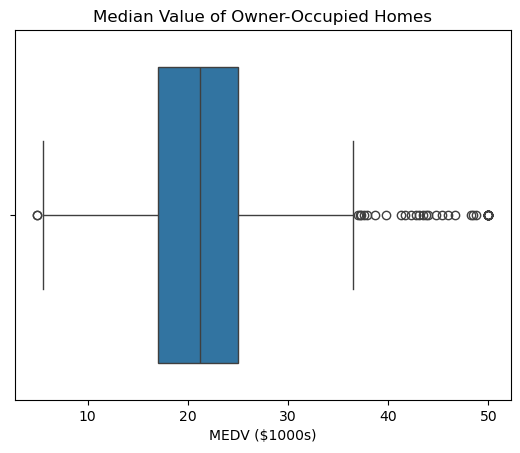

In [30]:
ax = sns.boxplot(
    data=df,
    x="MEDV",
)

ax.set_title("Median Value of Owner-Occupied Homes")
ax.set_xlabel("MEDV ($1000s)")

plt.show()

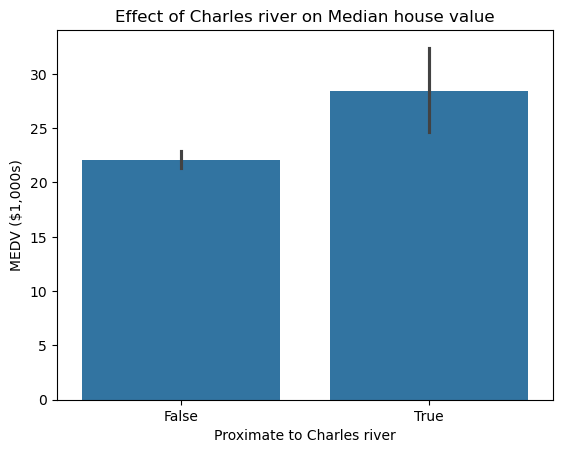

In [52]:
ax = sns.barplot(
    data=df,
    x="CHAS",
    y="MEDV",
)

ax.set_title("Effect of Charles river on Median house value")
ax.set_xlabel("Proximate to Charles river")
ax.set_ylabel("MEDV ($1,000s)")

ax.set_xticks([0, 1])
ax.set_xticklabels(["False", "True"])

plt.show()

In [40]:
df.loc[df["AGE"] <= 35, "age_group"] = "35% or less"
df.loc[(df["AGE"] > 35)&(df["AGE"] < 70), "age_group"] = "35% to 70%"
df.loc[df["AGE"] >= 70, "age_group"] = "70% or more"

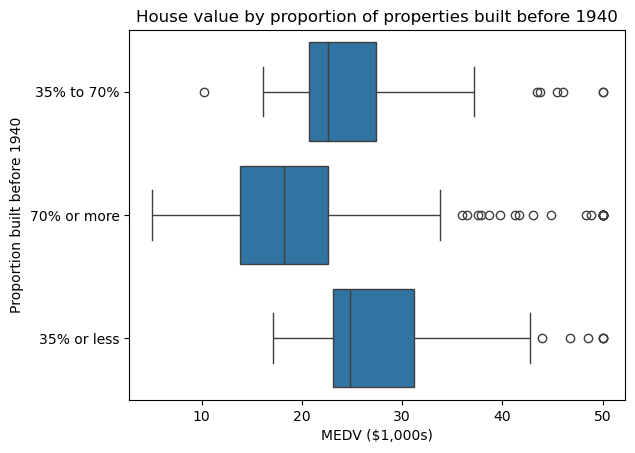

In [43]:
ax = sns.boxplot(
    data=df,
    x="MEDV",
    y="age_group",
)

ax.set_title("House value by proportion of properties built before 1940")
ax.set_xlabel("MEDV ($1,000s)")
ax.set_ylabel("Proportion built before 1940")

plt.show()

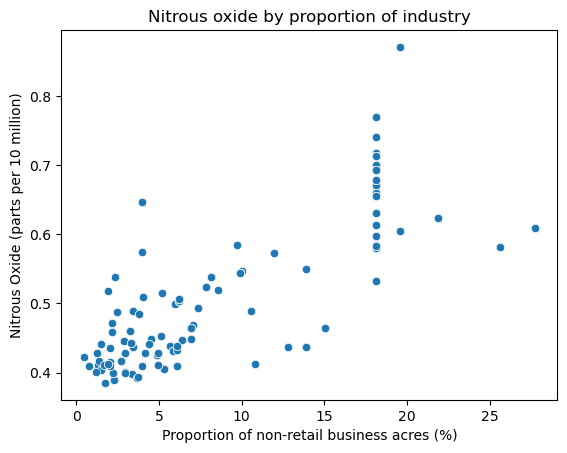

In [48]:
ax = sns.scatterplot(
    data=df,
    x="INDUS",
    y="NOX",
)

ax.set_title("Nitrous oxide by proportion of industry")
ax.set_xlabel("Proportion of non-retail business acres (%)")
ax.set_ylabel("Nitrous Oxide (parts per 10 million)")

plt.show()

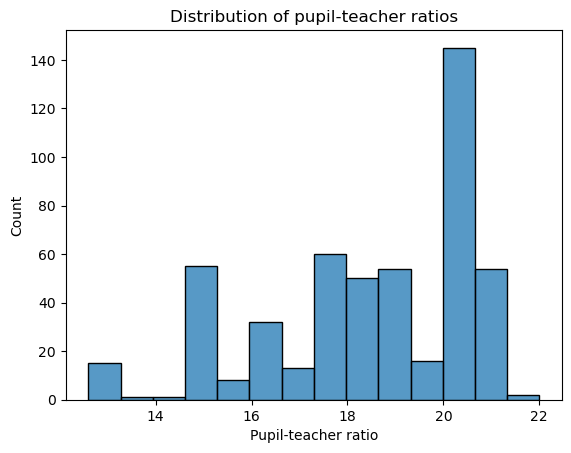

In [50]:
ax = sns.histplot(
    data=df,
    x="PTRATIO",
)

ax.set_title("Distribution of pupil-teacher ratios")
ax.set_xlabel("Pupil-teacher ratio")
ax.set_ylabel("Count")

plt.show()

## Task 3: Use appropriate tests to answer the questions provided

### T-test: Is there a significant difference in median value of houses bounded by the Charles river or not?

#### Null hypothesis
There is no difference in median house values associated with proximity to the Charles river.

#### Alternate hypothesis
There is a difference in median house values associated with proximity to the Charles river.

#### Statistical tests

Firstly, check whether the variances are equal

In [60]:
scipy.stats.levene(
    df[df["CHAS"] == 1]["MEDV"],
    df[df["CHAS"] == 0]["MEDV"],
    center='mean',
)

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

p < 0.05 implies that the variances are unequal, so we shall set `equal_var = False`

In [59]:
scipy.stats.ttest_ind(
    df[df["CHAS"] == 1]["MEDV"],
    df[df["CHAS"] == 0]["MEDV"],
    equal_var = False,
)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

#### Conclusion

Since the p-value (0.004) is less than $\alpha=0.05$, we reject the null hypothesis and conclude that median house prices are associated with proximity to the Charles river.

### ANOVA: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

#### Null hypothesis
There is no difference in median house values associated with the proportion that were built before 1940.

#### Alternate hypothesis
There is a difference in median house values associated with the proportion that were built before 1940.

#### Statistical tests

Firstly, check whether the variances are equal

In [63]:
scipy.stats.levene(
    df[df["age_group"] == "35% or less"]["MEDV"],
    df[df["age_group"] == "35% to 70%"]["MEDV"],
    df[df["age_group"] == "70% or more"]["MEDV"],
    center='mean',
)

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

$p = 0.06$ is greater than $\alpha = 0.05$, so we fail to reject the null hypothesis that the variances are different.

In [64]:
f_statistic, p_value = scipy.stats.f_oneway(
    df[df["age_group"] == "35% or less"]["MEDV"],
    df[df["age_group"] == "35% to 70%"]["MEDV"],
    df[df["age_group"] == "70% or more"]["MEDV"],
)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusion

Since the p-value is less than $\alpha=0.05$, we reject the null hypothesis and accept the alternate hypothesis that there is a difference in median house prices associated with the proportion that were built before 1940.

### Pearson R: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

#### Null hypothesis
There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

#### Alternate hypothesis
There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

#### Statistical tests

In [65]:
scipy.stats.pearsonr(
    df['NOX'],
    df['INDUS'],
)

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

#### Conclusion

Since the p-value is less than $\alpha=0.05$, we reject the null hypothesis and conclude that there is a relationship between nitric oxide and the proportion of non-retail business.

### Regression: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

#### Null hypothesis
There is no impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

#### Alternate hypothesis
There is an impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

#### Statistical tests

In [67]:
## insert code here
X = df["DIS"]
y = df["MEDV"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        17:34:48   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion

The p-value ($1.21e-8$) is less than $\alpha=0.05$ and thus we reject the null hypothesis and conclude that the weighted distance to employment centres affects the median value of homes.